In [2]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [3]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [4]:
psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','TG_1','FatPercentage _1','BMI_1','PSQI_TOTAL_1','TG_2','FatPercentage_2','BMI_2','PSQI_TOTAL_2']]

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

In [5]:
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,TG_1,FatPercentage _1,BMI_1,PSQI_TOTAL_1,TG_2,FatPercentage_2,BMI_2,PSQI_TOTAL_2
0,S0001,SMI,2,M,60,81,15.0,21.110190,8.0,75.0,15.9,20.161264,7.0
1,S0002,SMI,2,M,61,106,29.5,27.782064,4.0,101.0,27.9,27.673957,8.0
2,S0003,SMI,2,F,52,231,39.1,24.944742,3.0,183.0,36.7,24.823651,4.0
3,S0004,SMI,2,F,41,94,29.1,22.620489,6.0,78.0,30.9,22.392684,6.0
4,S0005,SMI,2,F,41,70,24.6,20.524157,10.0,42.0,26.8,20.722731,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,51,34.4,34.803410,5.0,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,104,43.8,30.903615,3.0,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,128,35.8,28.676533,3.0,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,163,26.8,24.549738,5.0,NaN,NaN,NaN,NaN


In [6]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,TG_1,FatPercentage _1,BMI_1,PSQI_TOTAL_1,TG_2,FatPercentage_2,BMI_2,PSQI_TOTAL_2
0,S0001,SMI,2,M,60,81,15.0,21.110190,8.0,75.0,15.9,20.161264,7.0
1,S0002,SMI,2,M,61,106,29.5,27.782064,4.0,101.0,27.9,27.673957,8.0
2,S0003,SMI,2,F,52,231,39.1,24.944742,3.0,183.0,36.7,24.823651,4.0
3,S0004,SMI,2,F,41,94,29.1,22.620489,6.0,78.0,30.9,22.392684,6.0
4,S0005,SMI,2,F,41,70,24.6,20.524157,10.0,42.0,26.8,20.722731,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,51,34.4,34.803410,5.0,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,104,43.8,30.903615,3.0,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,128,35.8,28.676533,3.0,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,163,26.8,24.549738,5.0,NaN,NaN,NaN,NaN


In [7]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [8]:
#<150 (정상) : 0 -> 중간 값인 80으로 조정
#한단계씩 상향 조정
#150~199 (약간 높음 - 체중감량과 운동요법) : 1 -> 80~150 (정상)
#200~499 (높음 - 생활요법과 함께 약물치료 고려) : 2 -> 150~199 (약간 높음)
#>500 (아주 높음 - 즉시 약물치료) : 3 한명도 해당 X -> 200~ (높음~아주높음)

psqi_df["TG_1"] = psqi_df["TG_1"].apply(lambda x: 0 if x<80 else 1 if 80<=x<150 else 2 if 150<=x<200 else 3)
psqi_df["TG_2"] = psqi_df["TG_2"].apply(lambda x: 0 if x<80 else 1 if 80<=x<150 else 2 if 150<=x<200 else 3)

In [9]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1 if x=='M' else 0)

psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0 if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0 if x=='<0.1' else x)

In [10]:
psqi_df

,SEX,AGE,TG_1,FatPercentage _1,BMI_1,PSQI_TOTAL_1,TG_2,FatPercentage_2,BMI_2,PSQI_TOTAL_2
0,1,60,1,15.00,21.110190,8.0,0,15.9,20.161264,7.0
1,1,61,1,29.50,27.782064,4.0,1,27.9,27.673957,8.0
2,0,52,3,39.10,24.944742,3.0,2,36.7,24.823651,4.0
3,0,41,1,29.10,22.620489,6.0,0,30.9,22.392684,6.0
4,0,41,0,24.60,20.524157,10.0,0,26.8,20.722731,8.0
...,...,...,...,...,...,...,...,...,...,...
227,0,63,0,40.30,26.259585,3.0,0,39.3,24.362705,8.0
228,1,57,0,30.44,28.630719,4.0,0,25.7,27.295178,3.0
229,0,35,1,31.00,21.641274,1.0,1,29.9,20.840203,2.0
230,0,61,0,27.30,20.421366,8.0,0,29.0,20.281993,7.0


In [11]:
psqi_df['TG_1'].value_counts()

0    100
1     90
2     24
3     18
Name: TG_1, dtype: int64

In [12]:
psqi_df['TG_2'].value_counts()

0    104
1     96
3     17
2     15
Name: TG_2, dtype: int64

In [13]:
#x,y 배열 생성

Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2


psqi_df_no_tg_1 = psqi_df[['BMI_1','PSQI_TOTAL_1']]
psqi_df_no_tg_2 = psqi_df[['BMI_2','PSQI_TOTAL_2']]
X1=psqi_df_no_tg_1.values
X2=psqi_df_no_tg_2.values
X=np.concatenate((X1, X2), axis=0)

X

Y

In [14]:
len(X), len(Y)

(464, 464)

In [15]:
np.random.seed(0)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

x_train

x_test

y_train

y_test

In [16]:
#RBF 커널을 적용한 SVM
s=svm.SVC(kernel='rbf', gamma=50, C=0.1)
s.fit(x_train,y_train)

SVC(C=0.1, gamma=50)

In [17]:
pred_train = s.predict(x_train) # 학습
print("예측된 학습 라벨:", pred_train)
print("실제 학습 라벨:", y_train)
print('============================================================================================')
pred_test = s.predict(x_test) # 테스트
print("예측된 테스트 라벨:", pred_test)
print("실제 테스트 라벨:", y_test)

print('\n\n\n\n')
print("train set prediction accuracy: {:.2f} %".format(np.mean(pred_train == y_train)*100)) # 예측 정확도
print("test set prediction accuracy: {:.2f} %".format(np.mean(pred_test == y_test)*100)) # 예측 정확도

예측된 학습 라벨: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
실제 학습 라벨: [0, 0, 0, 0, 3, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 1, 1, 0, 1, 3, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 3, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [18]:
#train set prediction accuracy: 43.94 % (SVC(kernel='rbf', gamma=50, C=0.1)) 
#test set prediction accuracy: 44.09 % (SVC(kernel='rbf', gamma=50, C=0.1))
#사용한 특징 2개 (2D)
#'PSQI_TOTAL_1','PSQI_TOTAL_2','BMI_1','BMI_2'

In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [20]:
C = 1.0 #regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, Y) for clf in models)

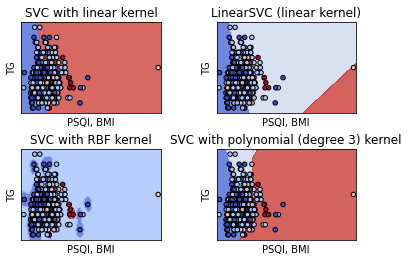

In [21]:
# plot title 형성
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# plot 그리기

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PSQI, BMI')
    ax.set_ylabel('TG')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()